C:\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


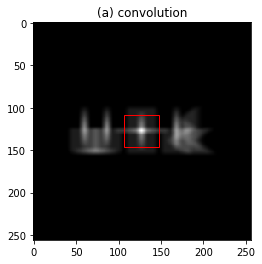

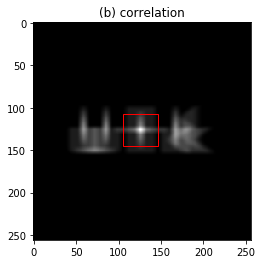

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:134: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:135: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:137: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


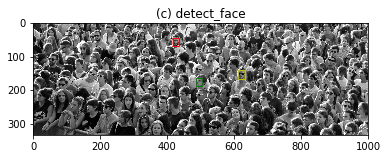

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import *
import math
import matplotlib.patches as mpatches
from scipy import signal


def rgb(img):
    gray=np.sum(img,axis=2)/3
    gray=gray.astype(np.float64)
    return gray

def imshift(x, p, q): #P,q为正时向右下移动
    p=-p
    n1=x.shape[1]#columns
    n2=x.shape[0]#rows
    k=p%n2
    l=q%n1
    xshifted=np.zeros([n2,n1])
    xshifted[n2-k:n2,0:l]=x[0:k,n1-l:n1]
    xshifted[0:n2-k,l:n1]=x[k:n2,0:n1-l]
    xshifted[0:n2-k,0:l]=x[k:n2,n1-l:n1]
    xshifted[n2-k:n2,l:n1]=x[0:k,0:n1-l]
    return xshifted

def pading(img, tpl):
    s1,s2=tpl.shape
    s1=int((s1)/2)
    s2=int((s2)/2)
    (n1,n2)=img.shape
    img_pad=np.zeros((n1+2*s1,n2+2*s2))
    img_pad[s1:s1+n1, s2:s2+n2]=img[:,:]
    for i in range (0,s1-1):
        img_pad[i,s2:s2+n2]=img[s1-i-1,:]
    for i in range (s1+n1+1,2*s1+n1):
        img_pad[i,s2:s2+n2]=img[n1-1-i, :]
    for j in range (0,s2-1):
        img_pad[0:2*s1+n1,j]=img_pad[0:2*s1+n1,2*s2-j-1]
    for j in range (s1+n1+1,2*s2+n2):
        img_pad[0:2*s1+n1,j]=img_pad[0:2*s1+n1,2*s2+n2-j]
    return img_pad

#question 1

def Convolution(img, tpl):
    n1,n2=img.shape
    p1,p2=tpl.shape
    s1,s2=(int(p1//2),int(p2//2))
    conv=np.zeros(img.shape, dtype=np.float64)
    for i in range (n1-p1):
        for j in range (n2-p2):
            temp=img[i:i+p1,j:j+p2]
            conv[i+s1,j+s2]=(np.sum(temp*tpl))
    return conv        

def draw_conv(img,tpl):
    conv=Convolution(img, tpl)
    s1,s2=tpl.shape
    location=np.where(conv==np.max(conv))
    x=location[0][0]
    y=location[1][0]
    [i,j]=np.array((x,y))-np.array((int((s1)/2),int((s2)/2)))
    rect = mpatches.Rectangle([j,i], s2, s1, color="r", fill=False)
    plt.subplot().add_patch(rect)
    return rect


#question(2)
def Correlation(img, tpl):
    return signal.correlate2d(img, tpl,mode="same", boundary="fill")


def draw_corr(img,tpl):
    corr=Correlation(img, tpl)
    s1,s2=tpl.shape
    location=np.where(corr==np.max(corr))
    x=location[0][0]
    y=location[1][0]
    [i,j]=np.array((x,y))-np.array((int((s1)/2),int((s2)/2)))
    rect = mpatches.Rectangle([j,i], s2, s1, color="r", fill=False)
    plt.subplot().add_patch(rect)
    return rect

#question(3)
def NCC(img,tpl):
    n1,n2=img.shape
    t1,t2=tpl.shape
    t=t1*t2
    s1,s2=int(t1//2),int(t2//2)
    t_mean=np.mean(tpl)
    t_sum=np.sum(tpl)
    result=np.zeros(img.shape,dtype=np.float64)
    diff_2=tpl-t_mean
    for i in range (n1-t1):
        for j in range (n2-t2):
            f_mean=(np.sum(img[i:i+t1,j:j+t2]))/t
            diff_1=img[i:i+t1,j:j+t2]-f_mean
            numerator=np.sum(diff_1*diff_2)
            diff_one=np.power(diff_1,2)
            sum1=np.sum(diff_one)
            sum2=np.sum(np.power(diff_2,2))
            dominator=math.sqrt(sum1*sum2)
            result[i+s1,j+s2]=numerator/dominator
    return result
    
def draw_NCC(img,tpl,color,threshold):
    haha=NCC(img,tpl)
    s1,s2=tpl.shape
    location=np.array(np.where(haha>=threshold*haha.max()), dtype=np.float64)
    for p in range (location.shape[1]):
        x=location[0][p]
        y=location[1][p]
        [i,j]=np.array((x,y))-np.array((int((s1)/2),int((s2)/2)))
        rect = mpatches.Rectangle([j,i], s2, s1, color=color, fill=False)
    plt.subplot().add_patch(rect)
    return rect

pic=imread('Letters.jpg').astype(np.float64)
template=imread('LettersTemplate.jpg').astype(np.float64)
conv=Convolution(pic,template)
plt.imshow(conv,cmap='gray')
draw_conv=draw_conv(pic,template)
plt.title('(a) convolution')
plt.show()

corr=Correlation(pic,template)
plt.imshow(corr,cmap='gray')
draw_corr=draw_corr(pic,template)
plt.title('(b) correlation')
plt.show()


pic_2=imread('crowd.jpg').astype(np.float64)
template_1=imread('face1.jpeg').astype(np.float64)
template_2=imread('face2.jpeg').astype(np.float64)
template_3=imread('face3.jpeg').astype(np.float64)
pic_gray=rgb(pic_2).astype(np.float64)
template_1_gray=rgb(template_1).astype(np.float64)
template_2_gray=rgb(template_2).astype(np.float64)
template_3_gray=rgb(template_3).astype(np.float64)
plt.imshow(pic_gray,cmap='gray')
plt.title('(c) detect_face')
draw_NCC(pic_gray,template_1_gray,'r', 0.8)
draw_NCC(pic_gray,template_2_gray,'g', 0.8)
detect_face=draw_NCC(pic_gray,template_3_gray,'y', 0.8)
plt.show()